In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

# Load Data

iris as demo 

In [3]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris()
col_rename = ['_'.join(name.split(' ')[:2]) for name in data.feature_names]

In [5]:
df_iris = pd.DataFrame(data.data, columns=col_rename)
df_iris['target'] = data['target']

In [6]:
df_iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


# 可视化

## countplot

对于离散型变量，只需要显示count的绘图，直接使用`sns.countplot`最方便。

如果如果采用`sns.distplot`就会很丑，且当类别大于2的时候，绘图出错。

In [7]:
pd.value_counts(df_iris.target)

2    50
1    50
0    50
Name: target, dtype: int64

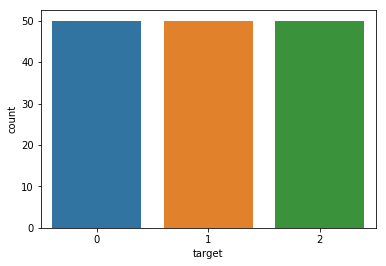

In [8]:
sns.countplot(df_iris.target)

In [9]:
# 3个类别的情况，绘图出错
# sns.distplot(df.target, kde=False)
# sns.distplot(df.target[df.target!=2], kde=False)

## barplot

对于df数据，barplot需要显式地指定x y，bar图中显式的结果为`point estimates`，默认显式的是均值mean的估计。

常用的estimater:

- np.sum
- np.mean, np.median
- len


In [10]:
df_tips = sns.load_dataset("tips")

In [11]:
df_tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


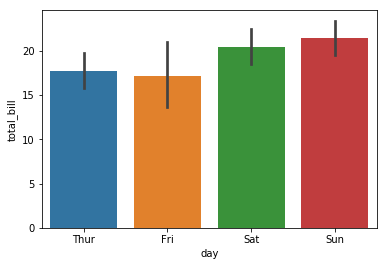

In [12]:
# 各天tips的均值，默认的estimator为np.mean
# sns.barplot(x="day", y="total_bill", data=df_tips, estimator=np.mean)
sns.barplot(x="day", y="total_bill", data=df_tips)

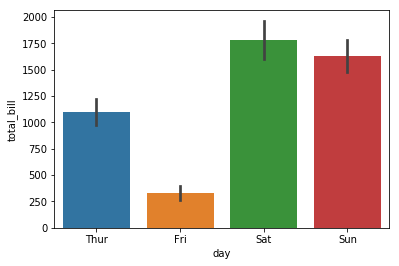

In [13]:
# 各天tips的总和
# df_tips.groupby('day')['total_bill'].sum()
sns.barplot(x="day", y="total_bill", data=df_tips, estimator=np.sum)

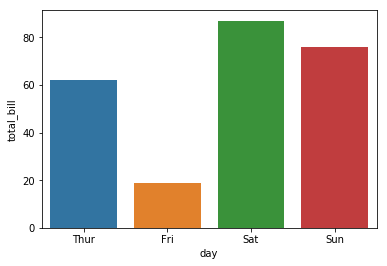

In [14]:
# 各天tips count数
# df_tips.groupby('day')['total_bill'].count()
sns.barplot(x="day", y="total_bill", data=df_tips, estimator=len)

barplot更有用的地方在于`hue`可以指定分level的特征col，辅助数据分析。

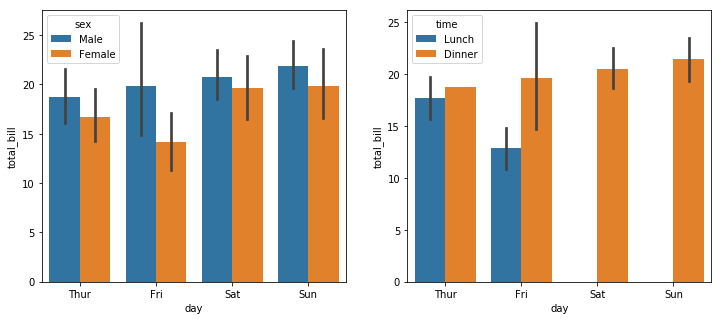

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(x="day", y="total_bill", data=df_tips, hue='sex')
plt.subplot(122)
sns.barplot(x="day", y="total_bill", data=df_tips, hue='time')